# HW 4 - Health Insurance Marketplace
From Kaggle:

> The Health Insurance Marketplace (HIM) Public Use Files (PUF) contain data on health and dental plans offered to individuals and small businesses through the U.S. Health Insurance Marketplace.

In [2]:
cd ../../../datasets

/Users/shelawu/DAT/datasets


**Possible Areas to Examine**
- How do plan rates and benefits vary across states?
- How do plan benefits relate to plan rates?
- How do plan rates vary by age?
- How do plans vary across insurance network providers?

Note: This data set is quite large, and taking a random 10-percent sample by state (with justification) is acceptable.

## Environment Set-Up:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

%matplotlib inline

In [4]:
# shows overview of benefits & cost sharing (categorical-type)
benefits = pd.read_csv('health-insurance-marketplace/BenefitsCostSharing.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
# talks about eligible rates based off dependencies, tobacco use, etc
rates = pd.read_csv('health-insurance-marketplace/Rate.csv')

# describes allowed dependencies
#business_rules = pd.read_csv('health-insurance-marketplace/BusinessRules.csv')
# talks about specific MOOP limits, deductibles, and other plan attributes
#plan_attrib = pd.read_csv('health-insurance-marketplace/PlanAttributes.csv')

In [6]:
pd.set_option('display.max_columns', None)

## Exploratory Data Analysis & Data Cleaning:

__Plan Benefits variation across states__
https://www.cms.gov/CCIIO/Resources/Data-Resources/Downloads/BenefitsCostSharing-DataDictionary-20.pdf
<br> Notice how only 39 states are represented. Noticeable exclusions include NY, CA, MD, NJ, WA, VA (D.C) and NV (LV)

In [7]:
benefits.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,Explanation,ImportDate,IsCovered,IsEHB,IsExclFromInnMOOP,IsExclFromOonMOOP,IsStateMandate,IsSubjToDedTier1,IsSubjToDedTier2,IssuerId,IssuerId2,LimitQty,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,Combined annual benefit maximum of $1000 per y...,2014-03-19 07:06:49,Covered,NaN,No,No,NaN,No,No,21989,21989,1000.0,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,NaN,No,No,21989,21989,1.0,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,NaN,Yes,Yes,21989,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,"24 month waiting period, See policy for additi...",2014-03-19 07:06:49,Covered,NaN,No,No,NaN,Yes,Yes,21989,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,NaN,Yes,Yes,21989,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


In [8]:
benefits.shape

(5048408, 32)

In [9]:
benefits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048408 entries, 0 to 5048407
Data columns (total 32 columns):
BenefitName            object
BusinessYear           int64
CoinsInnTier1          object
CoinsInnTier2          object
CoinsOutofNet          object
CopayInnTier1          object
CopayInnTier2          object
CopayOutofNet          object
EHBVarReason           object
Exclusions             object
Explanation            object
ImportDate             object
IsCovered              object
IsEHB                  object
IsExclFromInnMOOP      object
IsExclFromOonMOOP      object
IsStateMandate         object
IsSubjToDedTier1       object
IsSubjToDedTier2       object
IssuerId               int64
IssuerId2              int64
LimitQty               float64
LimitUnit              object
MinimumStay            float64
PlanId                 object
QuantLimitOnSvc        object
RowNumber              int64
SourceName             object
StandardComponentId    object
StateCode          

### Examining state distribution
Noticeable state exclusions: NY, CA, WA, NJ, and VA

In [10]:
benefits.StateCode.unique()

array(['AK', 'AL', 'AZ', 'FL', 'GA', 'IN', 'LA', 'MO', 'MS', 'NC', 'ND',
       'NJ', 'OK', 'PA', 'SC', 'TN', 'TX', 'WI', 'WY', 'AR', 'DE', 'IL',
       'KS', 'ME', 'MI', 'MT', 'NH', 'NM', 'VA', 'WV', 'IA', 'ID', 'NE',
       'OH', 'SD', 'UT', 'NV', 'OR', 'HI'], dtype=object)

In [11]:
len(benefits.StateCode.unique())

39

In [12]:
full_state_dist = benefits.groupby('StateCode')['BenefitName'].count()

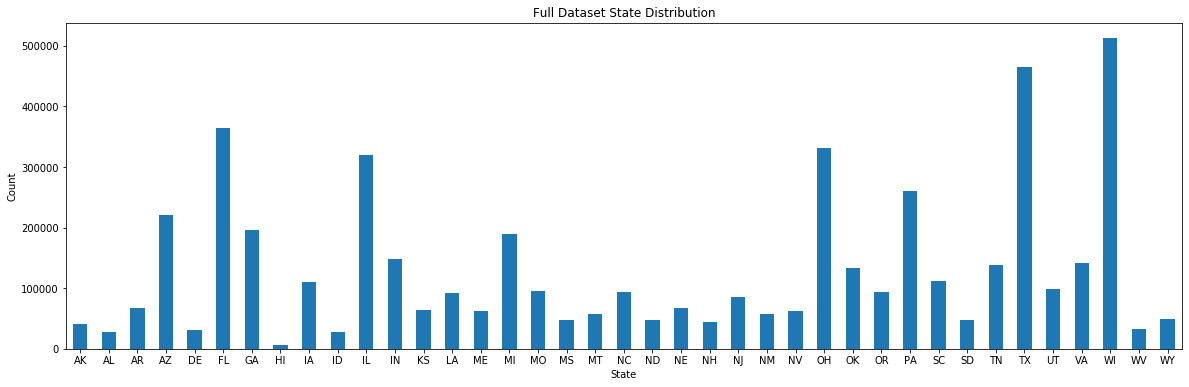

In [13]:
full_state_dist.plot(kind='bar', figsize=(20,6), rot=0)
plt.xlabel("State")
plt.ylabel("Count")
plt.title('Full Dataset State Distribution')
plt.show()

# Null Value Imputation
If clean after creating sample set, may mess up with the state distribution. Check what the NULL values look like and evaluate what they mean. (A) Notice rows with mostly NULL values, determined to be duds so deleted (B) 

In [14]:
benefits.isnull().sum()

BenefitName                  0
BusinessYear                 0
CoinsInnTier1          1113847
CoinsInnTier2          4571587
CoinsOutofNet          1113847
CopayInnTier1          1113847
CopayInnTier2          4571587
CopayOutofNet          1113849
EHBVarReason           3020737
Exclusions             4572247
Explanation            4075700
ImportDate                   0
IsCovered               215980
IsEHB                  1817362
IsExclFromInnMOOP       983986
IsExclFromOonMOOP       982626
IsStateMandate         4250463
IsSubjToDedTier1       2465877
IsSubjToDedTier2       2466054
IssuerId                     0
IssuerId2                    0
LimitQty               4360725
LimitUnit              4360539
MinimumStay            5031681
PlanId                       0
QuantLimitOnSvc        3264532
RowNumber                    0
SourceName                   0
StandardComponentId          0
StateCode                    0
StateCode2                   0
VersionNum                   0
dtype: i

In [15]:
# delete rows with all NaN values -- we'll use this as the threshold for dud instance
cols = ['CoinsInnTier1', 'CoinsInnTier2', 'CoinsOutofNet', 'CopayInnTier1','CopayInnTier2', 'CopayOutofNet']
benefits = benefits[benefits[cols].notnull().all(axis=1)]

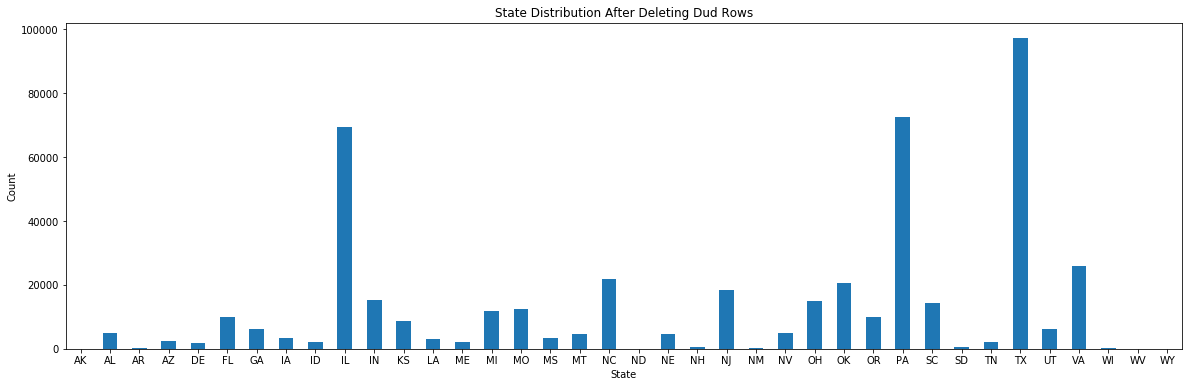

In [16]:
stat = benefits.groupby('StateCode')['BenefitName'].count()

stat.plot(kind='bar', figsize=(20,6), rot=0)
plt.xlabel("State")
plt.ylabel("Count")
plt.title('State Distribution After Deleting Dud Rows')
plt.show()

# While drastically altered state spread, they were dude values.

In [17]:
# now checking NULL values...
benefits.isnull().sum()

# Yay!!! Our metrics coinsurance & copay now have no NULLs.
# Let's investigate Deductable and Limit Qty/LimitUnit

BenefitName                 0
BusinessYear                0
CoinsInnTier1               0
CoinsInnTier2               0
CoinsOutofNet               0
CopayInnTier1               0
CopayInnTier2               0
CopayOutofNet               0
EHBVarReason           248483
Exclusions             408658
Explanation            330838
ImportDate                  0
IsCovered                   0
IsEHB                   78081
IsExclFromInnMOOP           0
IsExclFromOonMOOP           0
IsStateMandate         374251
IsSubjToDedTier1       289861
IsSubjToDedTier2       289861
IssuerId                    0
IssuerId2                   0
LimitQty               401506
LimitUnit              401562
MinimumStay            474960
PlanId                      0
QuantLimitOnSvc        295367
RowNumber                   0
SourceName                  0
StandardComponentId         0
StateCode                   0
StateCode2                  0
VersionNum                  0
dtype: int64

In [18]:
# they're identical -- del using 1 param for efficiency
a = benefits[benefits['IsSubjToDedTier1'].isnull()]
b = benefits[benefits['IsSubjToDedTier2'].isnull()]

a.equals(b)

True

In [19]:
benefits.IsSubjToDedTier1.value_counts()

Yes    136940
No      50020
Name: IsSubjToDedTier1, dtype: int64

In [20]:
# we'll impute NaN with 'No' -- deleting nulls drastically skews state repr
benefits[['IsSubjToDedTier1', 'IsSubjToDedTier2']] = benefits[['IsSubjToDedTier1','IsSubjToDedTier2']].fillna(value='No')

In [21]:
benefits.IsSubjToDedTier1.value_counts()

No     339881
Yes    136940
Name: IsSubjToDedTier1, dtype: int64

In [22]:
# now checking NULL values...
benefits.isnull().sum()

# Yay!!! Our metrics coinsurance & copay now have no NULLs.
# Let's investigate Deductable and Limit Qty/LimitUnit

BenefitName                 0
BusinessYear                0
CoinsInnTier1               0
CoinsInnTier2               0
CoinsOutofNet               0
CopayInnTier1               0
CopayInnTier2               0
CopayOutofNet               0
EHBVarReason           248483
Exclusions             408658
Explanation            330838
ImportDate                  0
IsCovered                   0
IsEHB                   78081
IsExclFromInnMOOP           0
IsExclFromOonMOOP           0
IsStateMandate         374251
IsSubjToDedTier1            0
IsSubjToDedTier2            0
IssuerId                    0
IssuerId2                   0
LimitQty               401506
LimitUnit              401562
MinimumStay            474960
PlanId                      0
QuantLimitOnSvc        295367
RowNumber                   0
SourceName                  0
StandardComponentId         0
StateCode                   0
StateCode2                  0
VersionNum                  0
dtype: int64

In [159]:
# isolate necessary columns
ben_df = benefits.iloc[:, np.r_[2:8, 14:16, 17:19, 24, 29]].copy()

In [160]:
ben_df.head()

,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,IsExclFromInnMOOP,IsExclFromOonMOOP,IsSubjToDedTier1,IsSubjToDedTier2,PlanId,StateCode
10049,0,0,100,100,100,0,No,No,No,No,46944AL0340001-00,AL
10050,20,20,20,0,0,0,No,No,Yes,Yes,46944AL0340001-00,AL
10051,20,20,20,0,0,0,No,No,Yes,Yes,46944AL0340001-00,AL
10052,20,20,20,0,0,0,No,No,Yes,Yes,46944AL0340001-00,AL
10053,20,20,20,0,0,0,No,No,Yes,Yes,46944AL0340001-00,AL


#### Do the same for rates:

In [151]:
rates_df = rates.iloc[:, 10:16]
rates_df.drop(['RatingAreaId', 'IndividualTobaccoRate', 'Tobacco'], axis=1, inplace=True)

In [152]:
rates_df.isnull().sum()

PlanId            0
Age               0
IndividualRate    0
dtype: int64

In [164]:
rates_df.shape

(12694445, 3)

In [161]:
# merge rates df with benefits df, capture Individual Rate, Couple
mergedf = ben_df.merge(rates_df, on='PlanId', how='outer')

In [165]:
mergedf.shape

(13171266, 14)

In [163]:
# amount that weren't able to match
mergedf.IndividualRate.isnull().sum()

476821

In [169]:
y = mergedf.loc[mergedf.IndividualRate.isnull()]
yt = y.groupby('StateCode')['PlanId'].count()

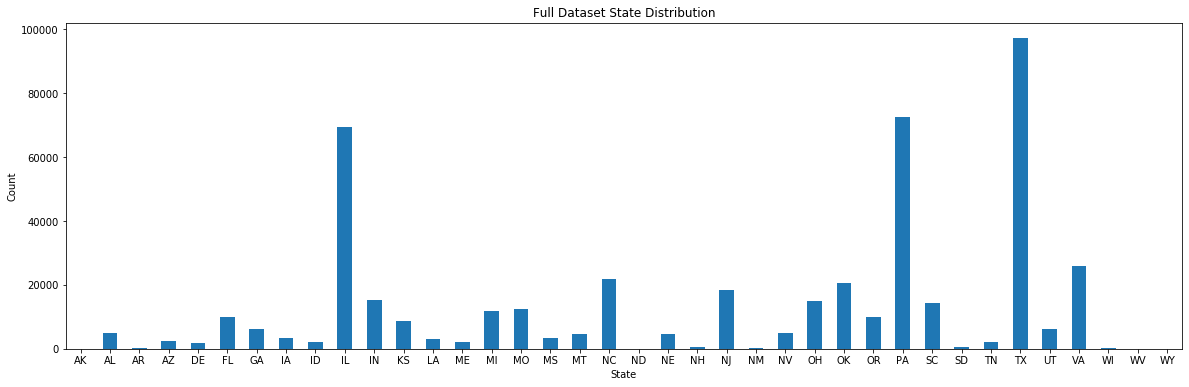

In [170]:
yt.plot(kind='bar', figsize=(20,6), rot=0)
plt.xlabel("State")
plt.ylabel("Count")
plt.title('Full Dataset State Distribution')
plt.show()

#### Create a 10% sample per state:
I'll create a for loop so that, per state, we are:
- isolating that state as its own df
- taking a 10% sample
- resulting dataframes can be stacked 

sample_df = pd.DataFrame(columns = benefits_cost.columns)
states = benefits.StateCode.unique()

for state in states:
    state_sample_df = (benefits.loc[benefits['StateCode'] == state]).sample(frac=0.1)
    sample_df = sample_df.append(state_sample_df)  

sample_df.shape

sample_df.head()

sample_df.to_csv('sampled_state_set.csv')

x = sample_df.groupby('StateCode')['BenefitName'].count()
x.plot(kind='bar', figsize=(20,6), rot=0)
plt.xlabel("State")
plt.ylabel("Count")
plt.title('Sampled Dataset State Distribution')
plt.show()

In [23]:
benefits.to_csv('benefits.csv')

## Data Encoding:

In [24]:
benefits['CoinsInnTier1'].unique()

array(['0%', '20% Coinsurance after deductible', 'No Charge',
       '50% Coinsurance after deductible',
       '0% Coinsurance after deductible',
       '10% Coinsurance after deductible', '30%', '20%', '50%', '10%',
       'No Charge after deductible', '25% Coinsurance after deductible',
       '18%', '25%', '40% Coinsurance after deductible', '40%',
       '18% Coinsurance after deductible', '35%',
       '35% Coinsurance after deductible', '21%',
       '15% Coinsurance after deductible',
       '5% Coinsurance after deductible',
       '30% Coinsurance after deductible', '$0',
       '9% Coinsurance after deductible',
       '19% Coinsurance after deductible',
       '29% Coinsurance after deductible', '49%', '8%',
       '60% Coinsurance after deductible', '15%',
       '75% Coinsurance after deductible',
       '70% Coinsurance after deductible', '100%',
       '80% Coinsurance after deductible',
       '45% Coinsurance after deductible', 'Not Applicable',
       '100% Coinsuran

In [25]:
# may investigate this $ significance later
dollar = benefits.loc[benefits['CoinsInnTier1'] == '$0']
dollar.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,Explanation,ImportDate,IsCovered,IsEHB,IsExclFromInnMOOP,IsExclFromOonMOOP,IsStateMandate,IsSubjToDedTier1,IsSubjToDedTier2,IssuerId,IssuerId2,LimitQty,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
353208,Weight Loss Programs,2014,$0,$0,$0,$0,$0,$0,Additional EHB Benefit,NaN,NaN,2014-01-29 08:00:05,Covered,NaN,No,No,NaN,No,No,11512,11512,NaN,NaN,NaN,11512NC0120001-02,NaN,101,HIOS,11512NC0120001,NC,NC,9
353934,Weight Loss Programs,2014,$0,$0,$0,$0,$0,$0,Additional EHB Benefit,NaN,NaN,2014-01-29 08:00:05,Covered,NaN,No,No,NaN,No,No,11512,11512,NaN,NaN,NaN,11512NC0120002-02,NaN,101,HIOS,11512NC0120002,NC,NC,9
354195,Weight Loss Programs,2014,$0,$0,$0,$0,$0,$0,Additional EHB Benefit,NaN,NaN,2014-01-29 08:00:05,Covered,NaN,No,No,NaN,No,No,11512,11512,NaN,NaN,NaN,11512NC0120003-02,NaN,101,HIOS,11512NC0120003,NC,NC,9
354874,Weight Loss Programs,2014,$0,$0,$0,$0,$0,$0,Additional EHB Benefit,NaN,NaN,2014-01-29 08:00:05,Covered,NaN,No,No,NaN,No,No,11512,11512,NaN,NaN,NaN,11512NC0120004-02,NaN,101,HIOS,11512NC0120004,NC,NC,9
390363,Mental/Behavioral Health Outpatient Services,2014,$0,$0,0%,$0,$0,$0,NaN,NaN,NaN,2013-11-26 13:14:08,Covered,Yes,No,No,NaN,Yes,Yes,91762,91762,NaN,NaN,NaN,91762NJ0070007-02,NaN,84,HIOS,91762NJ0070007,NJ,NJ,9


In [26]:
benefits.loc[benefits['CoinsInnTier1'] == '$0']['BenefitName'].unique()

array(['Weight Loss Programs',
       'Mental/Behavioral Health Outpatient Services',
       'Substance Abuse Disorder Outpatient Services',
       'Primary Care Visit to Treat an Injury or Illness',
       'Specialist Visit',
       'Other Practitioner Office Visit (Nurse, Physician Assistant)',
       'Infertility Treatment', 'Bariatric Surgery', 'Hearing Aids',
       'Eye Glasses for Children', 'Urgent Care Centers or Facilities',
       'Generic Drugs', 'Preferred Brand Drugs',
       'Non-Preferred Generic Drugs', 'Routine Eye Exam for Children',
       'Rehabilitative Speech Therapy',
       'Rehabilitative Occupational and Rehabilitative Physical Therapy',
       'Well Baby Visits and Care', 'Transplant',
       'Prescription Drugs Other', 'Pediatric Services Other',
       'Home Health Care Services', 'Emergency Room Services',
       'Emergency Transportation/Ambulance',
       'Inpatient Hospital Services (e.g., Hospital Stay)',
       'Skilled Nursing Facility',
       'Men

In [27]:
benefits.loc[benefits['CoinsInnTier1'] == '$0'].head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,Explanation,ImportDate,IsCovered,IsEHB,IsExclFromInnMOOP,IsExclFromOonMOOP,IsStateMandate,IsSubjToDedTier1,IsSubjToDedTier2,IssuerId,IssuerId2,LimitQty,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
353208,Weight Loss Programs,2014,$0,$0,$0,$0,$0,$0,Additional EHB Benefit,NaN,NaN,2014-01-29 08:00:05,Covered,NaN,No,No,NaN,No,No,11512,11512,NaN,NaN,NaN,11512NC0120001-02,NaN,101,HIOS,11512NC0120001,NC,NC,9
353934,Weight Loss Programs,2014,$0,$0,$0,$0,$0,$0,Additional EHB Benefit,NaN,NaN,2014-01-29 08:00:05,Covered,NaN,No,No,NaN,No,No,11512,11512,NaN,NaN,NaN,11512NC0120002-02,NaN,101,HIOS,11512NC0120002,NC,NC,9
354195,Weight Loss Programs,2014,$0,$0,$0,$0,$0,$0,Additional EHB Benefit,NaN,NaN,2014-01-29 08:00:05,Covered,NaN,No,No,NaN,No,No,11512,11512,NaN,NaN,NaN,11512NC0120003-02,NaN,101,HIOS,11512NC0120003,NC,NC,9
354874,Weight Loss Programs,2014,$0,$0,$0,$0,$0,$0,Additional EHB Benefit,NaN,NaN,2014-01-29 08:00:05,Covered,NaN,No,No,NaN,No,No,11512,11512,NaN,NaN,NaN,11512NC0120004-02,NaN,101,HIOS,11512NC0120004,NC,NC,9
390363,Mental/Behavioral Health Outpatient Services,2014,$0,$0,0%,$0,$0,$0,NaN,NaN,NaN,2013-11-26 13:14:08,Covered,Yes,No,No,NaN,Yes,Yes,91762,91762,NaN,NaN,NaN,91762NJ0070007-02,NaN,84,HIOS,91762NJ0070007,NJ,NJ,9


In [28]:
benefits.replace({'CoinsInnTier1': {'\$0': '0', ' Coinsurance after deductible': '','%': '','No Charge after deductible': '0', 'No Charge': '0','Not Applicable': '100'}},  inplace = True, regex=True)
benefits.replace({'CoinsInnTier2': {'\$0': '0', ' Coinsurance after deductible': '','%': '','No Charge after deductible': '0', 'No Charge': '0','Not Applicable': '100'}},  inplace = True, regex=True)
benefits.replace({'CoinsOutofNet': {'\$0': '0', ' Coinsurance after deductible': '','%': '','No Charge after deductible': '0', 'No Charge': '0','Not Applicable': '100'}},  inplace = True, regex=True)

In [29]:
benefits.CopayInnTier1.unique()

array(['$100', '$0', '$200', 'No Charge', '$35', '$50', '$15',
       '$200 Copay per Day', '$40', '$60', '$25', '$300 Copay per Day',
       '$55', '$20', '$395', '$300', '$45', '$10', '$75',
       '$75 Copay per Day', '$30', '$5', '$750',
       '$25 Copay after deductible', '$500', 'No Charge after deductible',
       '$50 Copay after deductible', '$0 Copay per Day', '$1,000', '$350',
       '$300 Copay after deductible', '$400',
       '$1000 Copay after deductible', '$100 Copay after deductible',
       '$60 Copay after deductible', '$75 Copay after deductible',
       '$1250 Copay after deductible', '$250 Copay per Day',
       '$0 Copay after deductible', '$40 Copay after deductible', '$150',
       '$100 Copay per Day', '$320', '$80', '$20 Copay after deductible',
       '$50 Copay per Day', '$120', '$750 Copay before deductible',
       '$75 Copay before deductible', '$100 Copay before deductible',
       '$500 Copay before deductible', '$110 Copay before deductible',
       

In [30]:
benefits.columns

Index(['BenefitName', 'BusinessYear', 'CoinsInnTier1', 'CoinsInnTier2',
       'CoinsOutofNet', 'CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet',
       'EHBVarReason', 'Exclusions', 'Explanation', 'ImportDate', 'IsCovered',
       'IsEHB', 'IsExclFromInnMOOP', 'IsExclFromOonMOOP', 'IsStateMandate',
       'IsSubjToDedTier1', 'IsSubjToDedTier2', 'IssuerId', 'IssuerId2',
       'LimitQty', 'LimitUnit', 'MinimumStay', 'PlanId', 'QuantLimitOnSvc',
       'RowNumber', 'SourceName', 'StandardComponentId', 'StateCode',
       'StateCode2', 'VersionNum'],
      dtype='object')

In [31]:
benefits.replace({'CopayInnTier1': {'\$': '', ',':'', 'No Charge after deductible': '0', 'No Charge': '0','Not Applicable': '0'}},  inplace = True, regex=True)
benefits['CopayInnTier1'] = benefits['CopayInnTier1'].str[:5]

In [32]:
benefits.replace({'CopayInnTier2': {'\$': '', ',':'', 'No Charge after deductible': '0', 'No Charge': '0','Not Applicable': '0'}},  inplace = True, regex=True)
benefits['CopayInnTier2'] = benefits['CopayInnTier2'].str[:5]
benefits.replace({'CopayOutofNet': {'\$': '', ',':'', 'No Charge after deductible': '0', 'No Charge': '0','Not Applicable': '0'}},  inplace = True, regex=True)
benefits['CopayOutofNet'] = benefits['CopayOutofNet'].str[:5]

In [38]:
benefits.replace({'CopayInnTier1': {'0%': '0', ' C':'', 'o':'','p':''}},  inplace = True, regex=True)
benefits.replace({'CopayInnTier2': {'0%': '0', ' C':'', 'o':'','p':''}},  inplace = True, regex=True)
benefits.replace({'CopayOutofNet': {'0%': '0', ' C':'', 'o':'','p':''}},  inplace = True, regex=True)

In [40]:
benefits[['CoinsInnTier1', 'CoinsInnTier2', 'CoinsOutofNet', 'CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet']] = benefits[['CoinsInnTier1', 'CoinsInnTier2', 'CoinsOutofNet', 'CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet']].astype(int)

In [41]:
benefits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476821 entries, 10049 to 5029561
Data columns (total 32 columns):
BenefitName            476821 non-null object
BusinessYear           476821 non-null int64
CoinsInnTier1          476821 non-null int64
CoinsInnTier2          476821 non-null int64
CoinsOutofNet          476821 non-null int64
CopayInnTier1          476821 non-null int64
CopayInnTier2          476821 non-null int64
CopayOutofNet          476821 non-null int64
EHBVarReason           228338 non-null object
Exclusions             68163 non-null object
Explanation            145983 non-null object
ImportDate             476821 non-null object
IsCovered              476821 non-null object
IsEHB                  398740 non-null object
IsExclFromInnMOOP      476821 non-null object
IsExclFromOonMOOP      476821 non-null object
IsStateMandate         102570 non-null object
IsSubjToDedTier1       476821 non-null object
IsSubjToDedTier2       476821 non-null object
IssuerId          

Add `coins_bin` and `copay_bin` cols. So far, I have bins for coinsurance rates but it's only within Tier 1. 
Currently we're analyzing, which states would be cheapest out of pocket as an individual, couple (neither smoke).

Later, I will analyze amongst which states offer wider provider coverage (that's when we make those 'does this benefit include Y/N') -- Tiers!  


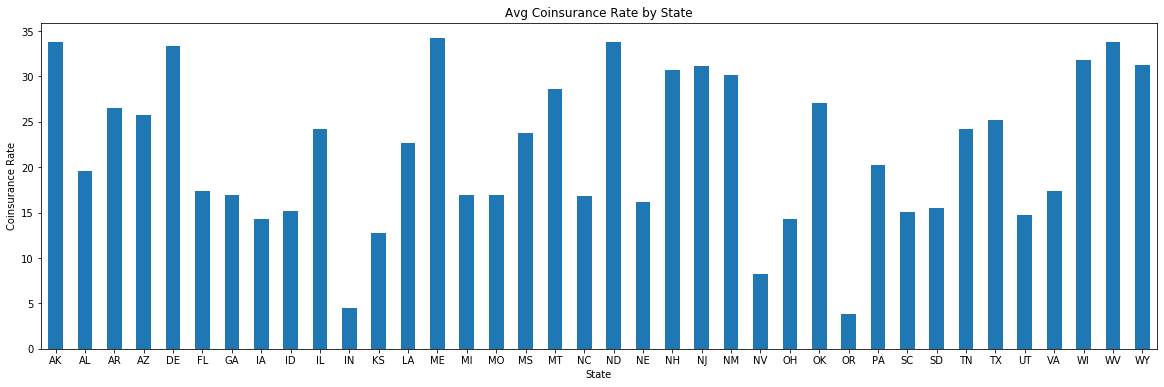

In [61]:
avg = benefits.groupby('StateCode')['CoinsInnTier1'].mean()

avg.plot(kind='bar', figsize=(20,6), rot=0)
plt.xlabel("State")
plt.ylabel("Coinsurance Rate")
plt.title('Avg Coinsurance Rate by State')
plt.show()

# While drastically altered state spread, they were dude values.

In [42]:
coinsinn1_bin = [
    (benefits['CoinsInnTier1'] >= 80) & (benefits['CoinsInnTier1'] <= 100),
    (benefits['CoinsInnTier1'] >= 60) & (benefits['CoinsInnTier1'] < 80),
    (benefits['CoinsInnTier1'] >= 40) & (benefits['CoinsInnTier1'] < 60),
    (benefits['CoinsInnTier1'] >= 20) & (benefits['CoinsInnTier1'] < 40),
    (benefits['CoinsInnTier1'] >= 0) & (benefits['CoinsInnTier1'] < 20)
]

bins = [0, 1, 2, 3, 4]

benefits['CoinsInn1_bin'] = np.select(coins_bin, bins)

In [46]:
coinsinn2_bin = [
    (benefits['CoinsInnTier2'] >= 80) & (benefits['CoinsInnTier2'] <= 100),
    (benefits['CoinsInnTier2'] >= 60) & (benefits['CoinsInnTier2'] < 80),
    (benefits['CoinsInnTier2'] >= 40) & (benefits['CoinsInnTier2'] < 60),
    (benefits['CoinsInnTier2'] >= 20) & (benefits['CoinsInnTier2'] < 40),
    (benefits['CoinsInnTier2'] >= 0) & (benefits['CoinsInnTier2'] < 20)
]

bins = [0, 1, 2, 3, 4]

benefits['CoinsInn2_bin'] = np.select(coins_bin, bins)

In [48]:
coinsoon_bin = [
    (benefits['CoinsOutofNet'] >= 80) & (benefits['CoinsOutofNet'] <= 100),
    (benefits['CoinsOutofNet'] >= 60) & (benefits['CoinsOutofNet'] < 80),
    (benefits['CoinsOutofNet'] >= 40) & (benefits['CoinsOutofNet'] < 60),
    (benefits['CoinsOutofNet'] >= 20) & (benefits['CoinsOutofNet'] < 40),
    (benefits['CoinsOutofNet'] >= 0) & (benefits['CoinsOutofNet'] < 20)
]

bins = [0, 1, 2, 3, 4]

benefits['CoinsOON_bin'] = np.select(coins_bin, bins)

In [51]:
benefits.CoinsInnTier1.describe()

count    476821.000000
mean         20.604189
std          27.889743
min           0.000000
25%           0.000000
50%          20.000000
75%          30.000000
max         100.000000
Name: CoinsInnTier1, dtype: float64

In [ ]:
# for ordinal encoding
coins_map = {
    '100': 0,
    '100% Coinsurance after deductible': 1
}

### Plan Rate variation across states
Analyze based off dependencies:
<br> (A) Tobacco Rate influence?
<br> (B) Dependency Rates:
- Individual
- Primary + 1 Dep / 2 Dep / 3+ Dep
- Couple
- Couple + 1 Dep / 2 Dep / 3+ Dep


In [115]:
save = benefits.columns.to_list()
for item in save:
    print(save.index(item)+1,item)

1 BenefitName
2 BusinessYear
3 CoinsInnTier1
4 CoinsInnTier2
5 CoinsOutofNet
6 CopayInnTier1
7 CopayInnTier2
8 CopayOutofNet
9 EHBVarReason
10 Exclusions
11 Explanation
12 ImportDate
13 IsCovered
14 IsEHB
15 IsExclFromInnMOOP
16 IsExclFromOonMOOP
17 IsStateMandate
18 IsSubjToDedTier1
19 IsSubjToDedTier2
20 IssuerId
21 IssuerId2
22 LimitQty
23 LimitUnit
24 MinimumStay
25 PlanId
26 QuantLimitOnSvc
27 RowNumber
28 SourceName
29 StandardComponentId
30 StateCode
31 StateCode2
32 VersionNum
33 CoinsBin
34 CoinsInn2 Bin
35 CoinsOON_bin


,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,IsExclFromInnMOOP,IsExclFromOonMOOP,IsSubjToDedTier1,IsSubjToDedTier2,PlanId,StateCode
10049,0,0,100,100,100,0,No,No,No,No,46944AL0340001-00,AL
10050,20,20,20,0,0,0,No,No,Yes,Yes,46944AL0340001-00,AL
10051,20,20,20,0,0,0,No,No,Yes,Yes,46944AL0340001-00,AL
10052,20,20,20,0,0,0,No,No,Yes,Yes,46944AL0340001-00,AL
10053,20,20,20,0,0,0,No,No,Yes,Yes,46944AL0340001-00,AL


In [135]:
ben_df = benefits.iloc[:, np.r_[2:8, 14:16, 17:19, 24, 29]]
# merge rates df with benefits df, capture Individual Rate, Couple
mergedf = ben_df.merge(rates_df, on='PlanId', how='outer')

In [138]:
mergedf.IndividualRate.isnull().sum()

476821

#### Investigate & impute NULL values

In [ ]:
rates_state.info()
# Age type is object

In [ ]:
# Remaining NULL values seem to all correlate. Let's check!
rates_state.isnull().sum()

In [ ]:
rates_state.IndividualTobaccoRate.describe()
# Min: $41.73, Max: $6604.610
# Avg: $543.69, Std: $294.59

In [ ]:
# Hypothesis: All NULL values have IndividualRate populated
tobrate_df = rates_state[pd.isnull(rates_state['IndividualTobaccoRate'])]
tobrate_df.IndividualRate.isnull().sum()

In [ ]:
# Impute NULL with NA
#rates_state.IndividualTobaccoRate.fillna('NA', inplace=True)

In [ ]:
# Remaining NULL values look like they correlate.
rates_state.isnull().sum()

In [ ]:
# new df withm NULL-populated columns  
rs_empty = rates_state.loc[:, rates_state.isnull().sum() > 0]

In [ ]:
rs_empty.isnull().astype(int).corr()

In [ ]:
# Impute NULL with NA. 0 would not be the correct imputation.
#rates_state.fillna('NA', inplace=True)

Now, we want to ensure that we're capturing a random but representative 10% sampling set. The goal is to minimize sample bias. My thoughts were either:
<br>(a) ensure that, per state, the sample set’s distribution curve matches full set’s curve
<br>(b) select significant features of full set & create a sample set that match conditions (i.e. individual plan to couple plan ratio)
<br>(c) blind selection of 10% sample per state and score after (introduces a lot of sample bias?)

In [ ]:
# Check how many integers live within each plan's column? 
# aka ignore the NA. Then...maybe I should change the NA to 0
# rates_state.loc[rates_state.IndividualRate] == '0'

Rates PUF shows every single rate option that exists per plan across states. That means that a plan is represented multiple times based on dependencies. So the features that would be significant in terms of representation is to ensure an even distribution of dependency options.
<br>Age: 0-20, 21, 22, Family Option
<br>IssuerId: Make sure even representation of insurance issuesrs?

In [ ]:
# Based off of 10% chosen from rates dataset, we will match to
# benefits dataset based off PlanId and/or Row Number

## Data Encoding
- __Nominal Data__: OneHotEncoder
- __Ordinal Data__: OrdinalEncoder (Mapping)
- __Numerical Data__: Scale
    - If also categorical, convert to str

In [ ]:
# need to ordinal encode data first (Y/N)
#benefits_state.groupby('StateCode')['IsSubjToDedTier1', 'IsSubjToDedTier2'].describe()

Taking a random 10-percent sample by state (with justification) is acceptable.